In [1]:
# NAME-AKSHAY SINGH ADHIKARI
#TASK-INTERMEDIATE TASK 1

In [2]:
# Given is a project as the intermediate task 
#decision trees on iris dataset to classify the new species using decision tree algorithm


In [66]:
# first,importing the python libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# import dataset
df=pd.read_csv("Iris (2).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
# to see the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
# to see first 5 records of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
# to see statistical data of the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
# to see last records 
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [72]:
# to see unique classes
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [73]:
#encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [76]:
# Here,After encoding,
#  0 denotes iris setosa
#  1 denotes iris-versicolor
#  2 denotes iris-virginica

In [75]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [11]:
# extracting the independent and dependent variables
# for independent variable in X, we will drop species and id column with axis1
x=df.drop(["Species","Id"],axis=1)
y=df["Species"]

In [12]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [13]:
# Now splitting the data into training and testing dataset
# training :70 and testing :30
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
print(x_train , x_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
138            6.0           3.0            4.8           1.8
129            7.2           3.0            5.8           1.6
3              4.6           3.1            1.5           0.2
119            6.0           2.2            5.0           1.5
99             5.7           2.8            4.1           1.3
..             ...           ...            ...           ...
113            5.7           2.5            5.0           2.0
114            5.8           2.8            5.1           2.4
86             6.7           3.1            4.7           1.5
69             5.6           2.5            3.9           1.1
91             6.1           3.0            4.6           1.4

[105 rows x 4 columns]      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
124            6.7           3.3            5.7           2.1
144            6.7           3.3            5.7           2.5
137            6.4           3.1            5.

In [15]:
y_test

124    2
144    2
137    2
16     0
108    2
41     0
9      0
62     1
149    2
43     0
141    2
58     1
130    2
29     0
14     0
22     0
143    2
132    2
25     0
142    2
125    2
13     0
55     1
44     0
97     1
33     0
101    2
78     1
70     1
50     1
11     0
1      0
56     1
20     0
111    2
60     1
127    2
4      0
103    2
105    2
30     0
146    2
80     1
18     0
123    2
Name: Species, dtype: int32

In [16]:
y_train

138    2
129    2
3      0
119    2
99     1
      ..
113    2
114    2
86     1
69     1
91     1
Name: Species, Length: 105, dtype: int32

<AxesSubplot:>

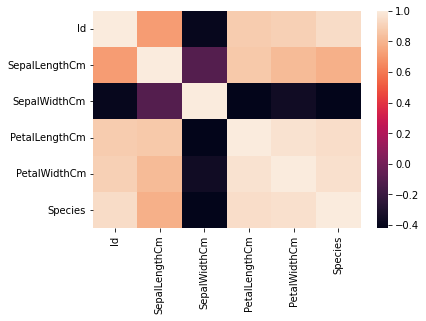

In [17]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

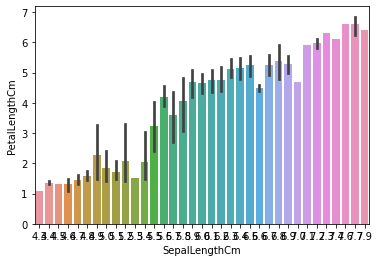

In [18]:
import seaborn as sns
sns.barplot(x=df["SepalLengthCm"],y=df['PetalLengthCm'])

# APPLYING DECISION TREE

In [54]:
# taking criteria as 'entropy'
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
# Now predicting the target class
y_pred=clf.predict(x_test)

In [56]:
y_pred

array([2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0,
       2])

In [57]:
# to see shape of training and testing data

In [58]:
y_test.shape ,y_train.shape ,x_test.shape , x_train.shape

((45,), (105,), (45, 4), (105, 4))

In [59]:
y_test.head()

124    2
144    2
137    2
16     0
108    2
Name: Species, dtype: int32

In [60]:
y_pred[0:5]

array([2, 2, 2, 0, 2])

In [26]:
print("Accuracy:",clf.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [27]:
print("Accuracy:",clf.score(x_train,y_train)*100)

Accuracy: 100.0


In [28]:
# to see confusion _matrix showing the true positive,true negative, false positive and false negative component
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[17,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 18]], dtype=int64)

In [29]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([1.        , 1.        , 0.94736842]),
 array([1. , 0.9, 1. ]),
 array([1.        , 0.94736842, 0.97297297]),
 array([17, 10, 18], dtype=int64))

C:\Users\Akshay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


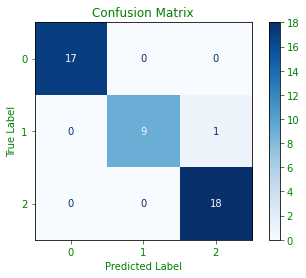

In [30]:
# visualizing the confusion matrix of data
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'green'
matrix = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

[Text(0.4444444444444444, 0.9166666666666666, 'X[3] <= 0.75\nentropy = 1.578\nsamples = 105\nvalue = [33, 40, 32]'),
 Text(0.3333333333333333, 0.75, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'X[3] <= 1.75\nentropy = 0.991\nsamples = 72\nvalue = [0, 40, 32]'),
 Text(0.4444444444444444, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.503\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[3] <= 1.65\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.1111111111111111, 0.25, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5555555555555556, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.7777777777777778, 0.25, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6666

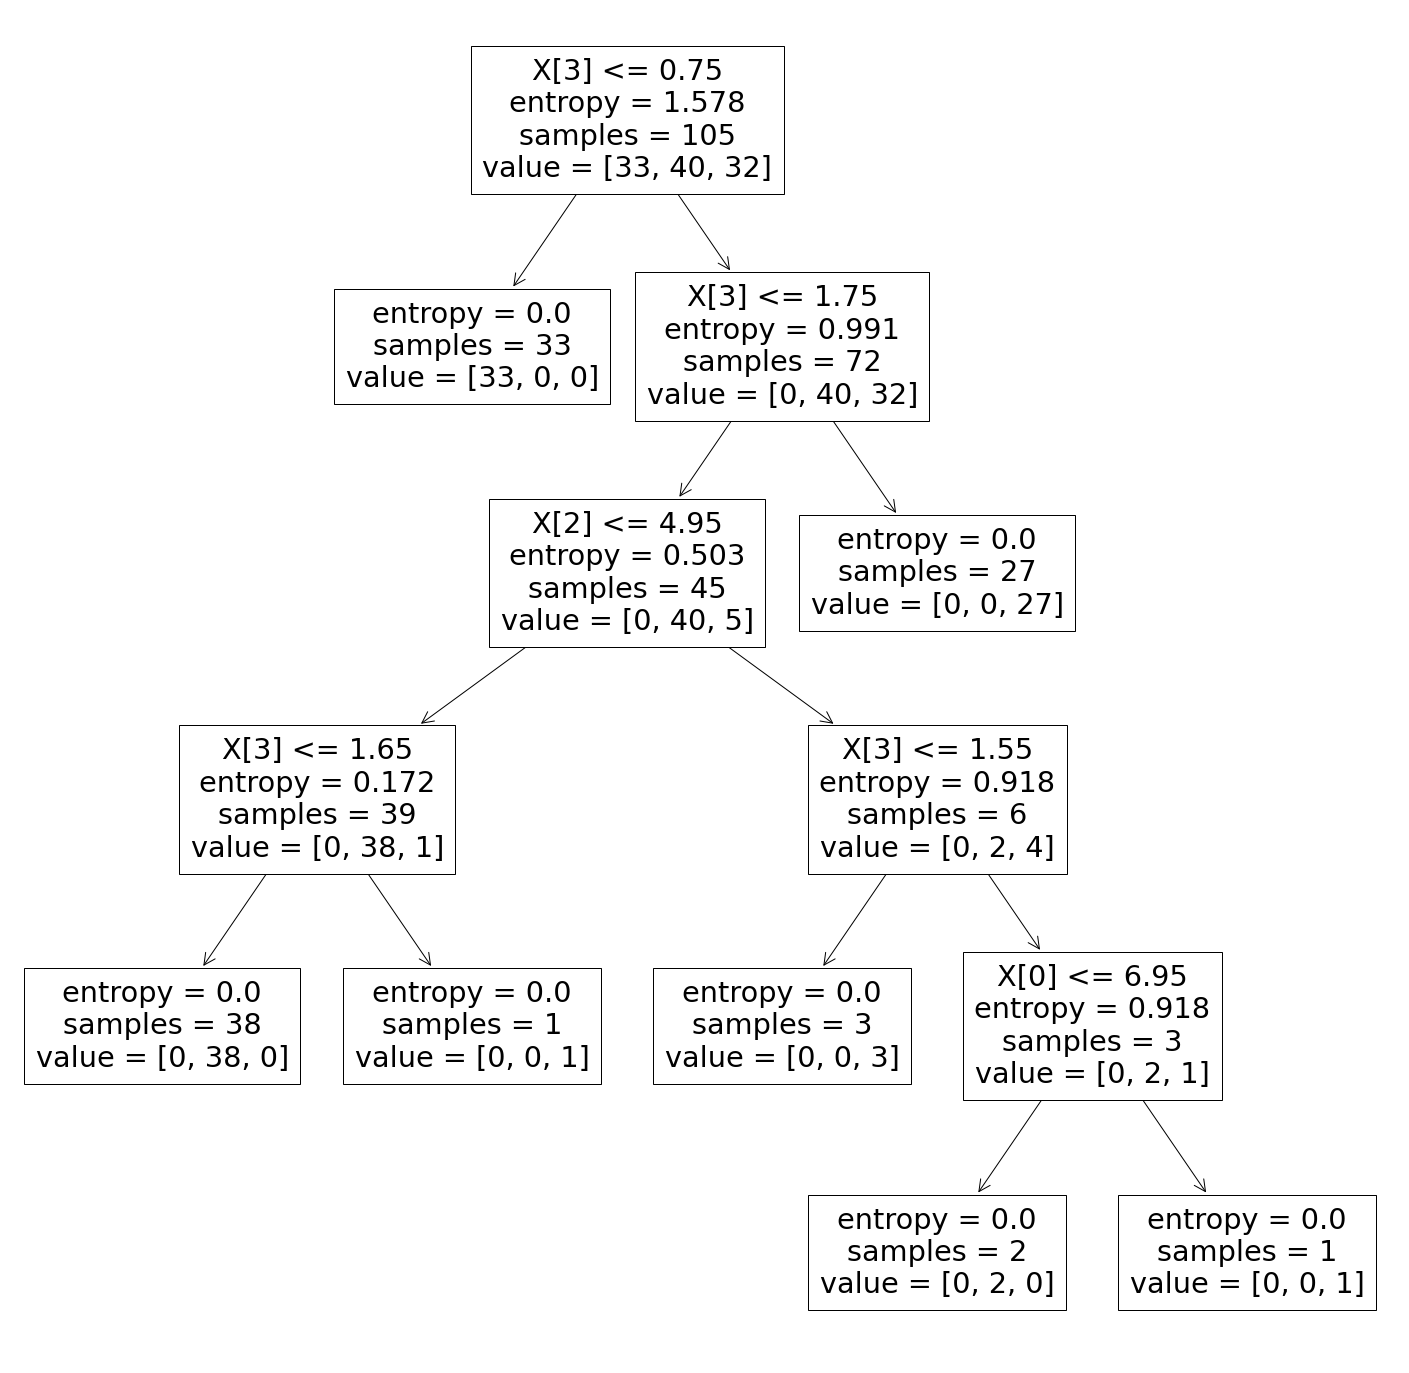

In [31]:
# Visualizing the decision tree using matplotlib
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (25,25))
tree.plot_tree(clf)

In [32]:
# accuracy score for the dataset
from sklearn.metrics import accuracy_score
clf=accuracy_score(y_test,y_pred)
clf

0.9777777777777777

In [33]:
# metrics performance from classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.90      0.95        10
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [34]:
# taking entropy as log_loss
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='log_loss')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

In [35]:
# Now predicting the target class
y_pred_1=clf.predict(x_test)
y_pred_1

array([2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0,
       2])

In [36]:
# accuracy score for the dataset
from sklearn.metrics import accuracy_score
clf=accuracy_score(y_test,y_pred_1)
clf

0.9777777777777777

In [37]:
# metrics performance from classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.90      0.95        10
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [47]:
# Let's predict the target class(species) using the feature variables

In [62]:
y_preds=clf.predict([[5.0,3.6,1.4,0.2]])
y_preds

C:\Users\Akshay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# we get prediction as 0 which denotes iris setosa